# PLASMA DIAGNOSTICS

## A catalogue of isoratios for plasma diagnostics (See previous Notebook)

## Using PyNeb for plasma diagnostics of a planetary nebula of high excitation

Analyse the planetary nebula IC 2165.

Hyung, S. , 1994, ApJS, 90, 119 gives the intensities of optical lines, corrected for extinction and relative to H$\beta$ = 100. The following table gives the ones that are important for diagnostics and abundance calculations:

### Construct the plasma diagnostic with PyNeb.  Hint: to find which line ratios provide useful diagnostics, consult Tables 1.9 to 1.14 from Stasinska (2009) available from internet at http://arxiv.org/abs/0704.0348.

##### We import some libraries

In [1]:
%matplotlib inline
import numpy as np
import pyneb as pn
import matplotlib.pyplot as plt

##### We read the observation file into an Observation object

In [2]:
help(pn.Observation)

Help on class Observation in module pyneb.core.pynebcore:

class Observation(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, obsFile=None, fileFormat='lines_in_cols', delimiter=None, err_default=0.1, corrected=False, errIsRelative=True)
 |      Define the observation object, which is a collection of observated intensities of one or more
 |      emission lines for one or more objects, with the corresponding errors.
 |      The observed intensities are read from a file or filled in by the addLine method.
 |      Includes an extinction correction object (pyneb.RedCorr) as Observation.extinction.
 |      
 |      Parameters:
 |          - obsFile       name of the file containing the observations. May be a file object or a file name 
 |          - fileFormat    lines_in_cols or lines_in_row depending on how the wavelengths are ordered 
 |                              (default: lines_in_cols)
 |          - delimiter     character separating entries 
 |          - err_defa

In [8]:
obs = pn.Observation('../Data/IC2165.dat', fileFormat='lines_in_rows', corrected=True)

warng EmissionLine: Atom Fe2 not valid


In [9]:
obs.printIntens()

Ne5_3426A [ 55.88000107]
O2_3726A [ 18.38999939]
O2_3729A [ 9.35999966]
Ne3_3869A [ 85.69999695]
S2_4069A [ 0.87]
S2_4076A [ 0.70999998]
O3_4363A [ 20.75]
Fe3_4659A [ 0.17]
He2r_4686A [ 63.47999954]
Fe3_4701A [ 0.14]
Ar4_4711A [ 5.32999992]
Ar4_4740A [ 5.86000013]
H1r_4861A [ 100.]
O3_4959A [ 386.1000061]
O3_5007A [ 1158.31005859]
Ar3_5192A [ 0.11]
N1_5198A [ 0.16]
N1_5200A [ 0.11]
Fe2_5272A [ 0.05]
Cl4_5323A [ 0.07]
Cl3_5518A [ 0.33000001]
Cl3_5538A [ 0.37]
O1_5577A [ 1.21000004]
N2_5755A [ 0.47]
He1r_5876A [ 7.23999977]
O1_6300A [ 1.20000005]
S3_6312A [ 1.32000005]
Ar5_6435A [ 1.32000005]
N2_6584A [ 17.12000084]
S2_6716A [ 0.86000001]
S2_6731A [ 1.34000003]
Ar5_7005A [ 2.07999992]
Ar3_7136A [ 7.11999989]
Ar4_7170A [ 0.31]
Ar4_7237A [ 0.25999999]
Ar4_7263A [ 0.23]
Cl4_7531A [ 0.34]
O2_7319A+ [ 1.13999999]
O2_7330A+ [ 0.95999998]
Ar3_7751A [ 1.5]
Cl4_8046A [ 0.73000002]
Cl3_8500A [ 0.37]
S3_9069A [ 5.96000004]


##### We instantiate the Diagnostics object and fill it with the diagnostics available from the observations. We print out these diagnostics.

In [10]:
diags = pn.Diagnostics()
diags.addDiagsFromObs(obs)
for d in np.sort(list(diags.diags.keys())):
    print(d) 

[ArIII] 5192/7136
[ArIII] 5192/7300+
[ArIV] 4740/4711
[ArIV] 7230+/4720+
[ClIII] 5538/5518
[ClIV] 5323/7531
[ClIV] 5323/7700+
[FeIII] 4659/4701
[NII] 5755/6584
[OIII] 4363/5007
[OIII] 4363/5007+
[OII] 3726/3729
[OII] 3727+/7325+
[OI] 5577/6300
[OI] 5577/6302
[SIII] 6312/9069
[SII] 4069/4076
[SII] 4072+/6720+
[SII] 6731/6716


##### We create the EmisGrids usefull for the set of diagnostics we will use.

In [36]:
#pn.utils.misc.cleanPypicFiles(all_=True)
emisgrids = pn.getEmisGridDict(atomDict=diags.atomDict)
pn.getEmisGridDict?

In [34]:
emisgrids

{'Ar3': <pyneb.core.emisGrid.EmisGrid at 0x7fc23e3ebcf8>,
 'Ar4': <pyneb.core.emisGrid.EmisGrid at 0x7fc23adea9e8>,
 'C3': <pyneb.core.emisGrid.EmisGrid at 0x7fc23e3eb588>,
 'Cl3': <pyneb.core.emisGrid.EmisGrid at 0x7fc23e3eb9b0>,
 'Cl4': <pyneb.core.emisGrid.EmisGrid at 0x7fc23e3eb198>,
 'Fe3': <pyneb.core.emisGrid.EmisGrid at 0x7fc23e3eb940>,
 'N2': <pyneb.core.emisGrid.EmisGrid at 0x7fc23adae860>,
 'Ne3': <pyneb.core.emisGrid.EmisGrid at 0x7fc23e3ebd68>,
 'Ne5': <pyneb.core.emisGrid.EmisGrid at 0x7fc23e3ebb70>,
 'O1': <pyneb.core.emisGrid.EmisGrid at 0x7fc23adaefd0>,
 'O2': <pyneb.core.emisGrid.EmisGrid at 0x7fc23e3eb518>,
 'O3': <pyneb.core.emisGrid.EmisGrid at 0x7fc23e3eb908>,
 'S2': <pyneb.core.emisGrid.EmisGrid at 0x7fc23e3eb6d8>,
 'S3': <pyneb.core.emisGrid.EmisGrid at 0x7fc23e3eb668>}

In [35]:
emisgrids['Ar4']

##### We make the diagnostic plot

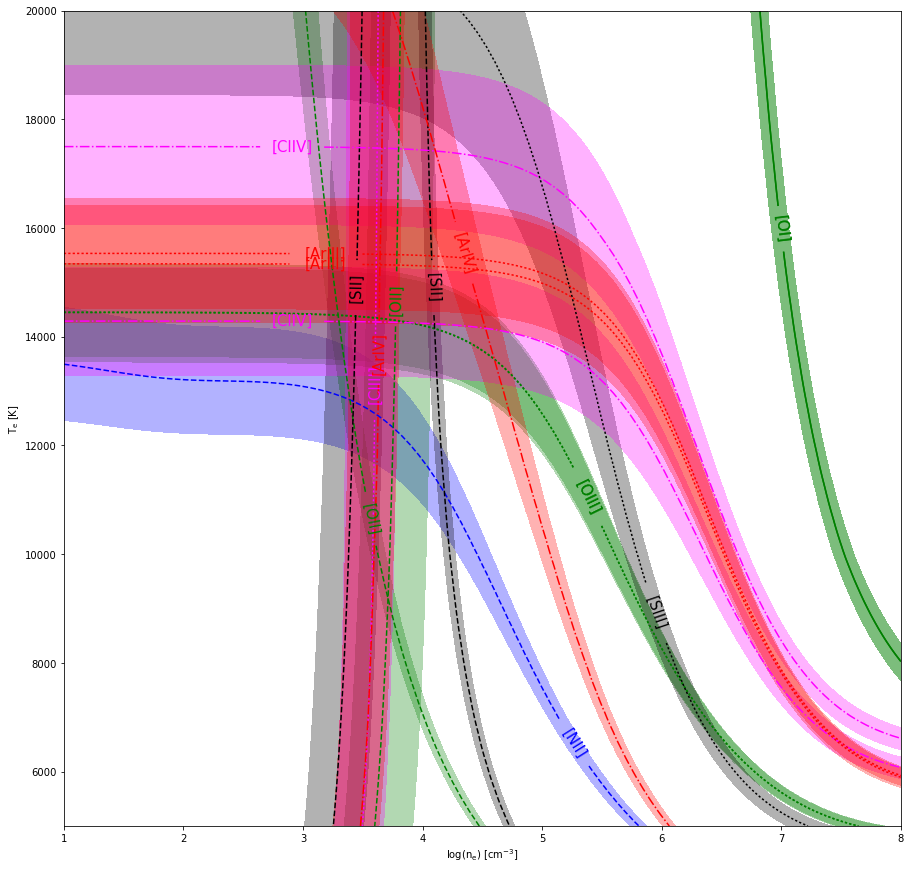

In [13]:
f, ax = plt.subplots(figsize=(15, 15))
diags.plot(emisgrids, obs, ax=ax) #the erros are assumed as 10% but it is possible to change it (see the confidance range)

### ??? What does the plasma diagnostic diagram say about the electron density in this object? Is there evidence for zones of different densities? What does it say about the electron temperature in the low excitation region? in the high excitation region? Compare with the diagnostic diagram published by Hyung.

### Add information from the UV spectrum (Table 1 from Hyung 1994) into the plasma diagnostic diagram.  nb: the UV data have already been dereddened and put to a common scale with the optical data using the HeII 1640/HeII 4686 ratio. The corresponding line intensities are as follows:

In [37]:
obs = pn.Observation()
obs.readData('../Data/IC2165.dat', fileFormat='lines_in_rows', corrected=True)
print(obs.n_lines)
obs.readData('../Data/IC2165_UV.dat', fileFormat='lines_in_rows', corrected=True)
print(obs.n_lines)

warng EmissionLine: Atom Fe2 not valid
43
49


### Find out what new diagnostics are available when including UV data.

### ??? Comment on the different values of the densities and temperatures from the different new diagnostics.

In [38]:
diags = pn.Diagnostics()
diags.addDiagsFromObs(obs)
emisgrids = pn.getEmisGridDict(atomDict=diags.atomDict)
for d in np.sort(list(diags.diags.keys())):
    print(d) 

[ArIII] 5192/7136
[ArIII] 5192/7300+
[ArIV] 4740/4711
[ArIV] 7230+/4720+
[CIII] 1909/1907
[ClIII] 5538/5518
[ClIV] 5323/7531
[ClIV] 5323/7700+
[FeIII] 4659/4701
[NII] 5755/6584
[NeV] 1575/3426
[OIII] 1666/4363
[OIII] 1666/5007
[OIII] 1666/5007+
[OIII] 4363/5007
[OIII] 4363/5007+
[OII] 3726/3729
[OII] 3727+/7325+
[OI] 5577/6300
[OI] 5577/6302
[SIII] 6312/9069
[SII] 4069/4076
[SII] 4072+/6720+
[SII] 6731/6716


warng Diagnostics: diag O3 L(1666)/(L(5007)+L(4959)) not used
warng Diagnostics: diag O3 L(1666)/L(5007) not used
warng Diagnostics: diag O3 L(1666)/L(4363) not used


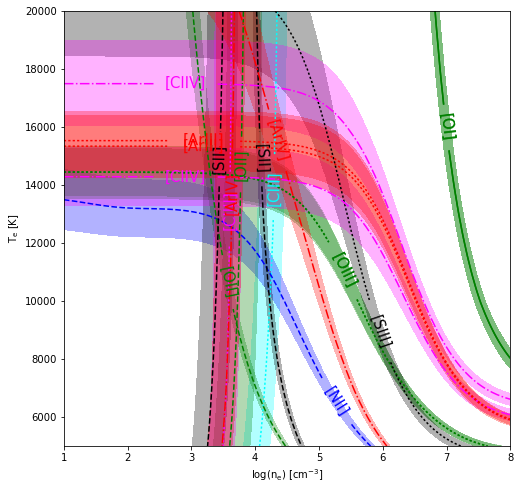

In [39]:
f, ax = plt.subplots(figsize=(8, 8))
diags.plot(emisgrids, obs, ax=ax)

### Infrared data have been obtained by ISO for this object (Pottasch et al, 1994, A&A 423, 593, Table 2, reproduced below). The measured intensities are in units of 10$^{−12}$ erg cm$^{−2}$ s$^{−1}$. Add information from these lines in the plasma diagnostic diagram. Caution: put the IR observations to scale with the optical ones using the H I 5-4/H$\beta$ ratio. We will assume that all the IR observations were done using the same 14 × 20 aperture.

##### We put the IR observation in another object, as they are not in the same units

In [40]:
obs_ir = pn.Observation('../Data/IC2165_IR.dat', fileFormat='lines_in_rows', corrected=True)

warng EmissionLine: line 4.1m for atom H1r not valid
warng EmissionLine: Atom Ar6 not valid


##### We can check that the intensities are the same as in the data file.

In [41]:
obs_ir.printIntens()

H1r_4.1m [ 2.80999994]
Mg4_4.5m [ 4.17999983]
Ar6_4.5m [ 1.82000005]
Mg5_5.6m [ 4.76000023]
Ne6_7.65m [ 0.51999998]
Ar5_7.9m [ 0.75]
Ar3_9.0m [ 2.26999998]
S4_10.5m [ 27.39999962]
Ne2_12.8m [ 1.5]
Ar5_13.1m [ 1.25]
Mg5_13.5m [ 0.51999998]
Ne5_14.3m [ 24.]
Ne3_15.6m [ 32.20000076]
S3_18.7m [ 5.55000019]
Ne5_24.3m [ 21.29999924]
O4_25.9m [ 84.19999695]
S3_33.5m [ 2.4000001]
Ne3_36.0m [ 3.55999994]
O3_51.8m [ 28.39999962]
N3_57.4m [ 4.53000021]
O3_88.3m [ 8.06000042]


##### We instantiate an HI recombination atom to compute the H5-4 and the H$\beta$ intensities and normalize the IR intensities.

In [42]:
H1r = pn.RecAtom('H', 1)

##### We compute the theoretical H5-4/Hbeta line ratio

In [43]:
H1_54_b_th = H1r.getEmissivity(1.4e4, 4e3, 5, 4) / \
    H1r.getEmissivity(1.4e4, 4e3, 4, 2)
print(H1_54_b_th) 

0.0701683717655


##### We compute the normalization coefficient so that H5-4/H$\beta$ is the theoretical value. Notice that we want the normalization to be H$\beta$=100.

In [44]:
coeff_norm = H1_54_b_th / obs_ir.getIntens()['H1r_4.1m'] * 100

##### We correct all the intensities in the obs_ir object

In [45]:
for line in obs_ir.lines:
    line.corrIntens *= coeff_norm

In [46]:
obs_ir.printIntens()

H1r_4.1m [ 7.01683718]
Mg4_4.5m [ 10.43785722]
Ar6_4.5m [ 4.54471327]
Mg5_5.6m [ 11.8861734]
Ne6_7.65m [ 1.29848942]
Ar5_7.9m [ 1.87282135]
Ar3_9.0m [ 5.6684059]
S4_10.5m [ 68.42040565]
Ne2_12.8m [ 3.7456427]
Ar5_13.1m [ 3.12136891]
Mg5_13.5m [ 1.29848942]
Ne5_14.3m [ 59.93028316]
Ne3_15.6m [ 80.40646514]
S3_18.7m [ 13.85887846]
Ne5_24.3m [ 53.1881244]
O4_25.9m [ 210.25540245]
S3_33.5m [ 5.99302855]
Ne3_36.0m [ 8.88965853]
O3_51.8m [ 70.91750078]
N3_57.4m [ 11.31184147]
O3_88.3m [ 20.12658781]


##### Now we can include the IR lines into the __obs__ object

In [47]:
print(obs.n_lines)
for line in obs_ir.lines:
    obs.addLine(line)
print(obs.n_lines)

49
70


In [48]:
obs.printIntens()

Ne5_3426A [ 55.88000107]
O2_3726A [ 18.38999939]
O2_3729A [ 9.35999966]
Ne3_3869A [ 85.69999695]
S2_4069A [ 0.87]
S2_4076A [ 0.70999998]
O3_4363A [ 20.75]
Fe3_4659A [ 0.17]
He2r_4686A [ 63.47999954]
Fe3_4701A [ 0.14]
Ar4_4711A [ 5.32999992]
Ar4_4740A [ 5.86000013]
H1r_4861A [ 100.]
O3_4959A [ 386.1000061]
O3_5007A [ 1158.31005859]
Ar3_5192A [ 0.11]
N1_5198A [ 0.16]
N1_5200A [ 0.11]
Fe2_5272A [ 0.05]
Cl4_5323A [ 0.07]
Cl3_5518A [ 0.33000001]
Cl3_5538A [ 0.37]
O1_5577A [ 1.21000004]
N2_5755A [ 0.47]
He1r_5876A [ 7.23999977]
O1_6300A [ 1.20000005]
S3_6312A [ 1.32000005]
Ar5_6435A [ 1.32000005]
N2_6584A [ 17.12000084]
S2_6716A [ 0.86000001]
S2_6731A [ 1.34000003]
Ar5_7005A [ 2.07999992]
Ar3_7136A [ 7.11999989]
Ar4_7170A [ 0.31]
Ar4_7237A [ 0.25999999]
Ar4_7263A [ 0.23]
Cl4_7531A [ 0.34]
O2_7319A+ [ 1.13999999]
O2_7330A+ [ 0.95999998]
Ar3_7751A [ 1.5]
Cl4_8046A [ 0.73000002]
Cl3_8500A [ 0.37]
S3_9069A [ 5.96000004]
N4_1487A [ 32.52999878]
Ne5_1575A [ 16.31999969]
O3_1666A [ 21.70999908]
N3_

##### We do the new diagnostic plot using all the lines

In [49]:
diags = pn.Diagnostics()
diags.addDiagsFromObs(obs)

In [50]:
for d in np.sort(list(diags.diags.keys())):
    print(d)

[ArIII] (7751+7136)/9m
[ArIII] 5192/7136
[ArIII] 5192/7300+
[ArIII] 7136/9m
[ArIV] 4740/4711
[ArIV] 7230+/4720+
[CIII] 1909/1907
[ClIII] 5538/5518
[ClIV] 5323/7531
[ClIV] 5323/7700+
[FeIII] 4659/4701
[NII] 5755/6584
[NeIII] 15.6m/36.0m
[NeIII] 3869/15.6m
[NeV] 1575/3426
[OIII] 1666/4363
[OIII] 1666/5007
[OIII] 1666/5007+
[OIII] 4363/5007
[OIII] 4363/5007+
[OIII] 5007/88m
[OIII] 51m/88m
[OII] 3726/3729
[OII] 3727+/7325+
[OI] 5577/6300
[OI] 5577/6302
[SIII] 18.7m/33.5m
[SIII] 6312/18.7m
[SIII] 6312/9069
[SIII] 9069/18.7m
[SII] 4069/4076
[SII] 4072+/6720+
[SII] 6731/6716


In [54]:
diags.delDiag('[SIII] 6312/18.7m')
diags.delDiag('[OIII] 4363/5007+')
diags.delDiag('[OIII] 1666/5007+')
diags.delDiag('[OIII] 1666/4363')
diags.delDiag('[ArIII] 5192/7300+')
diags.delDiag('[OI] 5577/6302')
#these diagnostics are being removed for being redundant
for d in np.sort(list(diags.diags.keys())):
    print(d) 

warng Diagnostics: [SIII] 6312/18.7m not in diagnostic, cannot be removed
warng Diagnostics: [OIII] 4363/5007+ not in diagnostic, cannot be removed
warng Diagnostics: [OIII] 1666/5007+ not in diagnostic, cannot be removed
warng Diagnostics: [OIII] 1666/4363 not in diagnostic, cannot be removed
warng Diagnostics: [ArIII] 5192/7300+ not in diagnostic, cannot be removed
warng Diagnostics: [OI] 5577/6302 not in diagnostic, cannot be removed
[ArIII] (7751+7136)/9m
[ArIII] 5192/7136
[ArIII] 7136/9m
[ArIV] 4740/4711
[ArIV] 7230+/4720+
[CIII] 1909/1907
[ClIII] 5538/5518
[ClIV] 5323/7531
[ClIV] 5323/7700+
[FeIII] 4659/4701
[NII] 5755/6584
[NeIII] 15.6m/36.0m
[NeIII] 3869/15.6m
[NeV] 1575/3426
[OIII] 1666/5007
[OIII] 4363/5007
[OIII] 5007/88m
[OIII] 51m/88m
[OII] 3726/3729
[OII] 3727+/7325+
[OI] 5577/6300
[SIII] 18.7m/33.5m
[SIII] 6312/9069
[SIII] 9069/18.7m
[SII] 4069/4076
[SII] 4072+/6720+
[SII] 6731/6716


In [52]:
emisgrids = pn.getEmisGridDict(atomDict=diags.atomDict)

warng Diagnostics: diag O3 L(1666)/L(5007) not used


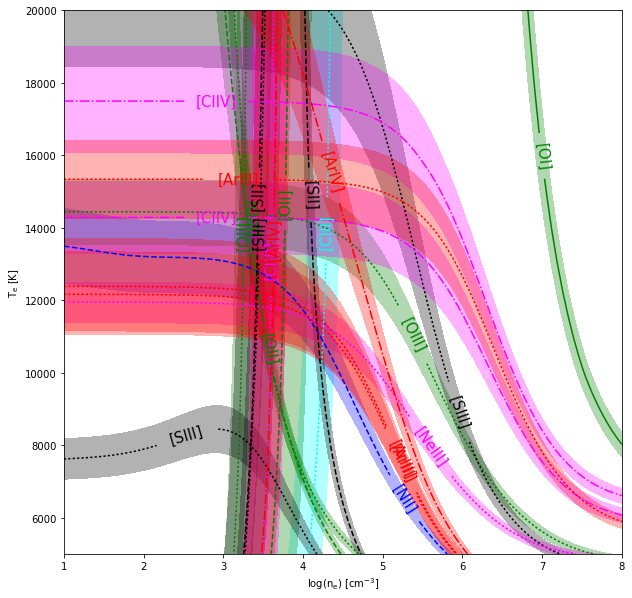

In [53]:
f, ax = plt.subplots(figsize=(10, 10))
diags.plot(emisgrids, obs, ax=ax)

### ??? Comment on the new diagnostics

### ??? If you have not done it yet, find an image of IC 2165 on the internet. Comment.

In [8]:
# the following is to have the nice style in the Notebook.
# Don't remove this.
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()